In [1]:
import pandas as pd
iris=pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
X=iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [3]:
Y=iris['Species']

In [4]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
Y=iris['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y)

In [7]:
print(Ytrain.value_counts())

1    38
0    38
2    36
Name: Species, dtype: int64


In [8]:
print(Ytest.value_counts())

2    14
1    12
0    12
Name: Species, dtype: int64


In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
kmodel=KNeighborsClassifier(n_neighbors=6)

In [11]:
kmodel.fit(Xtrain,Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [12]:
kmodel.predict([[2.2,3.2,1.5,1.2]])

array([0], dtype=int64)

In [13]:
Ypred_train=kmodel.predict(Xtrain)
(Ypred_train==Ytrain).sum()/len(Ytrain)

0.9553571428571429

In [14]:
kmodel.score(Xtrain,Ytrain)

0.9553571428571429

In [15]:
Ypred_test=kmodel.predict(Xtest)
(Ypred_test==Ytest).sum()/len(Ytest)

0.9473684210526315

In [16]:
kmodel.score(Xtest,Ytest)

0.9473684210526315

In [17]:
train_accuracy = []
test_accuracy = []
for i in range(1,15):
    km=KNeighborsClassifier(n_neighbors=i)
    km.fit(Xtrain,Ytrain)
    train_accuracy.append(km.score(Xtrain,Ytrain))
    test_accuracy.append(km.score(Xtest,Ytest))

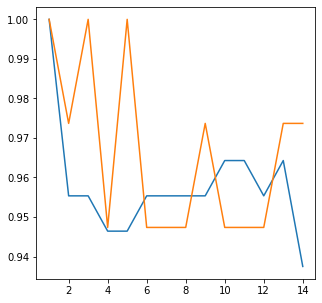

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot(range(1,15),train_accuracy)
plt.plot(range(1,15),test_accuracy)
plt.show()
